# 3.2 Analysis

In [ ]:
# Watermark detection

import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

torch.manual_seed(17)

In [ ]:
import torch
import torchmetrics
from tqdm import tqdm

percentiles = [0., 0.005, 0.01, 0.02, 0.03, 0.05, 0.10, 0.15, 0.25, 0.5]

model_names = ['{percentile}_model'.format(percentile = percentiles[x]) for x in range(len(percentiles))]

n_classes = 256

aucs = torch.zeros([len(model_names), 4, n_classes])
target = torch.tensor([0 if x<998 else 1 for x in range(2*998)])


# include paths to trained models
for i, model_name in tqdm(enumerate(model_names)):
    acitvations = torch.load('.../{model_name}_wtrmrks.tnsr'.format(model_name = model_name))
    
    for j in range(4):
        for r in range(n_classes):
            aucs[i, j, r] = torchmetrics.functional.classification.binary_auroc(torch.cat((acitvations[:, 0, r], acitvations[:, j+1, r]), 0), target)

In [ ]:
import pandas as pd

df = pd.DataFrame()

names = []
for model_name in model_names:
    names+= [model_name for i in range(256)]

df["AUC ROC"] = torch.cat([aucs[i,0] for i in range(len(model_names))], axis = 0)
df["Model"] = names

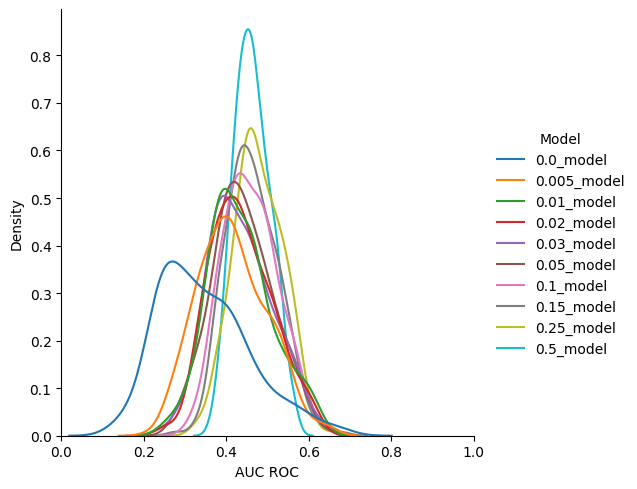

In [ ]:
import seaborn as sns

g = sns.displot(data=df, x = "AUC ROC", hue = "Model", kind = "kde")
g.set(xlim=(0., 1))
plt.show()